In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('/home/onno/Thesis/Scripts')
import my_tools
from my_tools import file_dic, plot_dic
from cmap import ncl_colormap
from mpl_toolkits.basemap import Basemap
from scipy import stats
import matplotlib
plt.rcParams.update({'font.size': 15})


Tile plot good and bad forecasts based on MAE

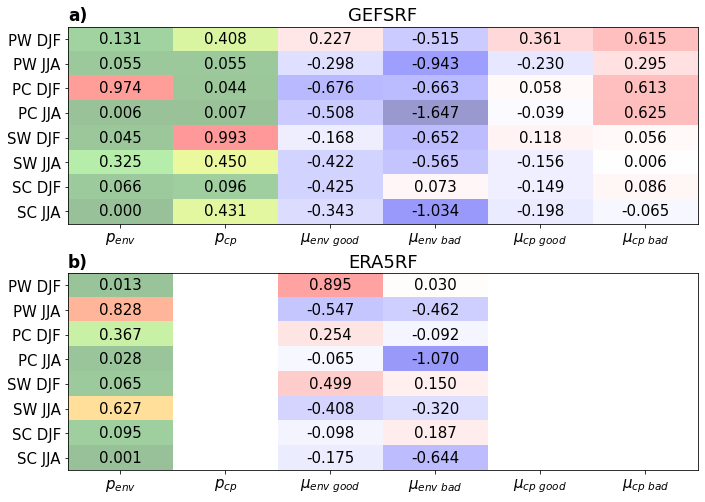

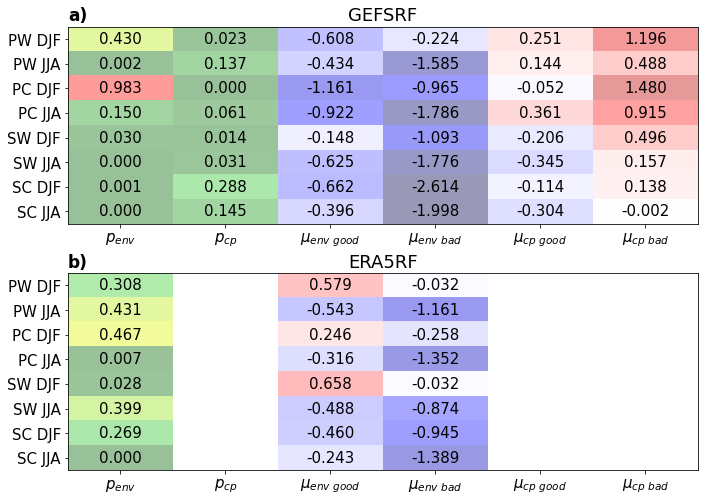

In [2]:
#set path
path = '/media/onno/Algemeen/Thesis/fcst_RWP_properties/histograms/'
path_to_save = '/media/onno/Algemeen/Thesis/Main_Figures/'
#Load standardized RWP property forecast errors for statistical signficance
file_standardized = 'standardized_forecast_errors_stat_significance_lead_day_{}.txt'
#Load absolute forecast errors to plot biases
file_AV = 'AV_forecast_errors_stat_significance_lead_day_{}.txt'
#Row labels for figure
row_labelz = ['PW DJF','PW JJA','PC DJF','PC JJA',
             'SW DJF','SW JJA','SC DJF','SC JJA']
#Column labels for figure
column_labelz = ['$p_{{env}}$','$p_{{cp}}$',
                '$μ_{{env\ good}}$','$μ_{{env\ bad}}$','$μ_{{cp\ good}}$',
                '$μ_{{cp\ bad}}$']
#custom colormap for background color
colorz = [(1,'#ff0000'),(0.75,'#ff6600'),(0.5,'#ffff00'),
          (0.3,'#33cc33'),(0,'#006600')]   
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colorz[::-1], N=1024)

#loop over lead days
lead_dayz = [3,5]
for lead_day in lead_dayz:
    #load standardized and absolute forcast errors
    df_stand = pd.read_csv(path+file_standardized.format(lead_day),index_col=0)
    df_AV = pd.read_csv(path+file_AV.format(lead_day),index_col=0)
    #Only the data from the first 6 columns are for GEFS
    df_stand_GFS = df_stand.iloc[:,:6]
    df_AV_GFS = df_AV.iloc[:,:6]
    #create figure
    fig,axz = plt.subplots(2,1,figsize=(10,7))
    ax1 = axz.flat[0]
    #split dataframes up to be able to use different color maps
    df_GFS_p = df_stand_GFS.iloc[:,:2]
    df_GFS_p_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_p_mask[:,:2] = df_GFS_p.values
    df_GFS_mu = df_AV_GFS.iloc[:,2:]
    df_GFS_mu_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_mu_mask[:,2:] = df_GFS_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax1.imshow(df_GFS_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax1.imshow(df_GFS_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax1.set_yticks(np.arange(len(row_labelz)))
    ax1.set_yticklabels(row_labelz)
    ax1.set_xticks(np.arange(len(column_labelz)))
    ax1.set_xticklabels(column_labelz)
    ax1.set_title('GEFSRF')
    ax1.text(x=0,y=1.1,s='a'+')',transform=ax1.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                ax1.text(j,i,'{:.3f}'.format(df_stand_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                ax1.text(j,i,'{:.3f}'.format(df_AV_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    #for ERA5RF only the last 6 columns corresponds to its values
    df_AV_ERA5RF = df_AV.iloc[:,6:]
    df_stand_ERA5RF = df_stand.iloc[:,6:]
    ax2 = axz.flat[1]    
    #split dataframes up to be able to use different color maps
    df_ERA5RF_p = df_stand_ERA5RF.iloc[:,:2]
    df_ERA5RF_p_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_p_mask[:,:2] = df_ERA5RF_p.values
    df_ERA5RF_mu = df_AV_ERA5RF.iloc[:,2:]
    df_ERA5RF_mu_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_mu_mask[:,2:] = df_ERA5RF_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax2.imshow(df_ERA5RF_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax2.imshow(df_ERA5RF_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax2.set_yticks(np.arange(len(row_labelz)))
    ax2.set_yticklabels(row_labelz)
    ax2.set_xticks(np.arange(len(column_labelz)))
    ax2.set_xticklabels(column_labelz)
    ax2.set_title('ERA5RF')
    ax2.text(x=0,y=1.1,s='b'+')',transform=ax2.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                if np.isnan(df_stand_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_stand_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                if np.isnan(df_AV_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_AV_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    fig.subplots_adjust(left=0.1,right=0.975,bottom=0.06,top=0.94,hspace=0.25)
    fig.savefig(path_to_save+'forecast_errors_tile_plot_lead_day_{}_MAE'.format(lead_day),dpi=150)


Tile plot good and bad forecasts based on MAE Northwestern Europe

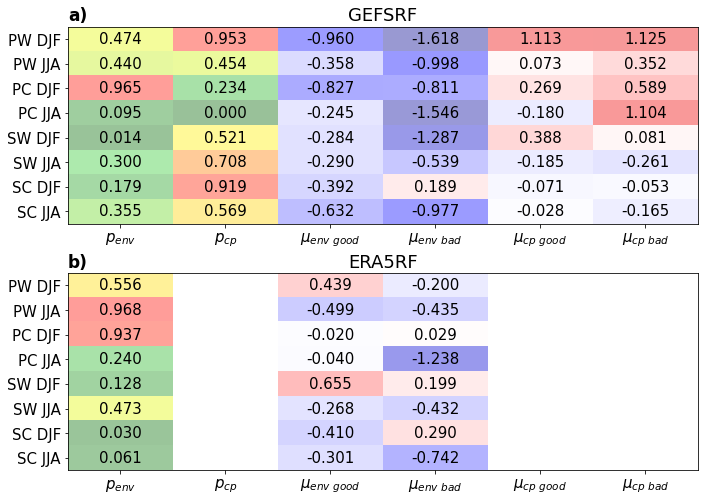

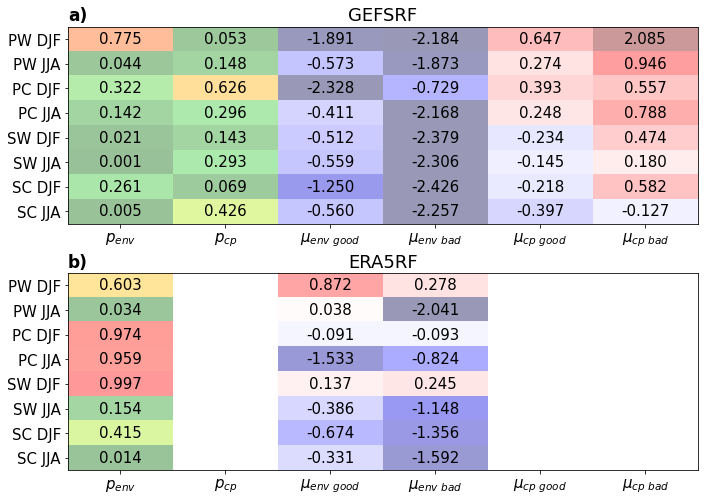

In [3]:
#set path
path = '/media/onno/Algemeen/Thesis/fcst_RWP_properties/histograms/'
path_to_save = '/media/onno/Algemeen/Thesis/Main_Figures/'
#Load standardized RWP property forecast errors for statistical signficance
file_standardized = 'standardized_forecast_errors_stat_significance_lead_day_{}_NW_Europe.txt'
#Load absolute forecast errors to plot biases
file_AV = 'AV_forecast_errors_stat_significance_lead_day_{}_NW_Europe.txt'
#Row labels for figure
row_labelz = ['PW DJF','PW JJA','PC DJF','PC JJA',
             'SW DJF','SW JJA','SC DJF','SC JJA']
#Column labels for figure
column_labelz = ['$p_{{env}}$','$p_{{cp}}$',
                '$μ_{{env\ good}}$','$μ_{{env\ bad}}$','$μ_{{cp\ good}}$',
                '$μ_{{cp\ bad}}$']
#custom colormap for background color
colorz = [(1,'#ff0000'),(0.75,'#ff6600'),(0.5,'#ffff00'),
          (0.3,'#33cc33'),(0,'#006600')]   
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colorz[::-1], N=1024)

#loop over lead days
lead_dayz = [3,5]
for lead_day in lead_dayz:
    #load standardized and absolute forcast errors
    df_stand = pd.read_csv(path+file_standardized.format(lead_day),index_col=0)
    df_AV = pd.read_csv(path+file_AV.format(lead_day),index_col=0)
    #Only the data from the first 6 columns are for GEFS
    df_stand_GFS = df_stand.iloc[:,:6]
    df_AV_GFS = df_AV.iloc[:,:6]
    #create figure
    fig,axz = plt.subplots(2,1,figsize=(10,7))
    ax1 = axz.flat[0]
    #split dataframes up to be able to use different color maps
    df_GFS_p = df_stand_GFS.iloc[:,:2]
    df_GFS_p_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_p_mask[:,:2] = df_GFS_p.values
    df_GFS_mu = df_AV_GFS.iloc[:,2:]
    df_GFS_mu_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_mu_mask[:,2:] = df_GFS_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax1.imshow(df_GFS_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax1.imshow(df_GFS_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax1.set_yticks(np.arange(len(row_labelz)))
    ax1.set_yticklabels(row_labelz)
    ax1.set_xticks(np.arange(len(column_labelz)))
    ax1.set_xticklabels(column_labelz)
    ax1.set_title('GEFSRF')
    ax1.text(x=0,y=1.1,s='a'+')',transform=ax1.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                ax1.text(j,i,'{:.3f}'.format(df_stand_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                ax1.text(j,i,'{:.3f}'.format(df_AV_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    #for ERA5RF only the last 6 columns corresponds to its values
    df_AV_ERA5RF = df_AV.iloc[:,6:]
    df_stand_ERA5RF = df_stand.iloc[:,6:]
    ax2 = axz.flat[1]    
    #split dataframes up to be able to use different color maps
    df_ERA5RF_p = df_stand_ERA5RF.iloc[:,:2]
    df_ERA5RF_p_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_p_mask[:,:2] = df_ERA5RF_p.values
    df_ERA5RF_mu = df_AV_ERA5RF.iloc[:,2:]
    df_ERA5RF_mu_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_mu_mask[:,2:] = df_ERA5RF_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax2.imshow(df_ERA5RF_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax2.imshow(df_ERA5RF_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax2.set_yticks(np.arange(len(row_labelz)))
    ax2.set_yticklabels(row_labelz)
    ax2.set_xticks(np.arange(len(column_labelz)))
    ax2.set_xticklabels(column_labelz)
    ax2.set_title('ERA5RF')
    ax2.text(x=0,y=1.1,s='b'+')',transform=ax2.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                if np.isnan(df_stand_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_stand_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                if np.isnan(df_AV_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_AV_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    fig.subplots_adjust(left=0.1,right=0.975,bottom=0.06,top=0.94,hspace=0.25)
    fig.savefig(path_to_save+'forecast_errors_tile_plot_lead_day_{}_MAE_NW_Europe'.format(lead_day),dpi=150)


Tile plot good and bad forecasts based on duration error

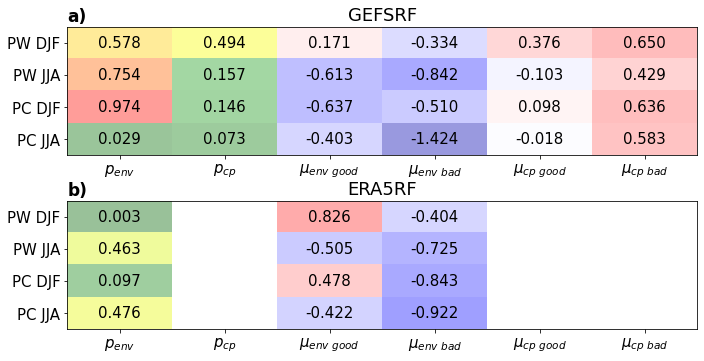

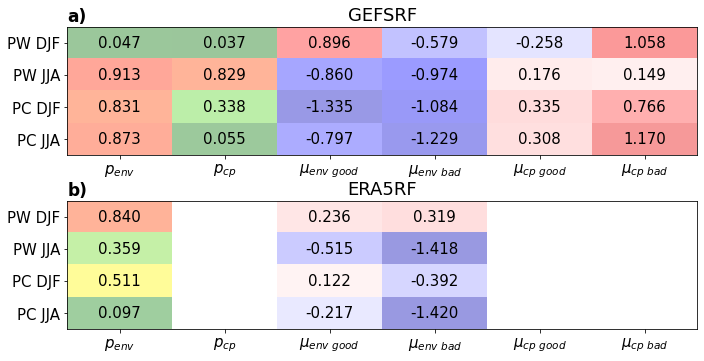

In [4]:
#set path
path = '/media/onno/Algemeen/Thesis/fcst_RWP_properties/duration/histograms/'
path_to_save = '/media/onno/Algemeen/Thesis/Main_Figures/'
#Load standardized RWP property forecast errors for statistical signficance
file_standardized = 'standardized_forecast_errors_stat_significance_lead_day_{}.txt'
#Load absolute forecast errors to plot biases
file_AV = 'AV_forecast_errors_stat_significance_lead_day_{}.txt'
#Row labels for figure
row_labelz = ['PW DJF','PW JJA','PC DJF','PC JJA']
#Column labels for figure
column_labelz = ['$p_{{env}}$','$p_{{cp}}$',
                '$μ_{{env\ good}}$','$μ_{{env\ bad}}$','$μ_{{cp\ good}}$',
                '$μ_{{cp\ bad}}$']
#custom colormap for background color
colorz = [(1,'#ff0000'),(0.75,'#ff6600'),(0.5,'#ffff00'),
          (0.3,'#33cc33'),(0,'#006600')]   
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colorz[::-1], N=1024)

#loop over lead days
lead_dayz = [3,5]
for lead_day in lead_dayz:
    #load standardized and absolute forcast errors
    df_stand = pd.read_csv(path+file_standardized.format(lead_day),index_col=0)
    df_AV = pd.read_csv(path+file_AV.format(lead_day),index_col=0)
    #Only the data from the first 6 columns are for GEFS
    df_stand_GFS = df_stand.iloc[:4,:6]
    df_AV_GFS = df_AV.iloc[:4,:6]
    #create figure
    fig,axz = plt.subplots(2,1,figsize=(10,5))
    ax1 = axz.flat[0]
    #split dataframes up to be able to use different color maps
    df_GFS_p = df_stand_GFS.iloc[:,:2]
    df_GFS_p_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_p_mask[:,:2] = df_GFS_p.values
    df_GFS_mu = df_AV_GFS.iloc[:,2:]
    df_GFS_mu_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_mu_mask[:,2:] = df_GFS_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax1.imshow(df_GFS_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax1.imshow(df_GFS_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax1.set_yticks(np.arange(len(row_labelz)))
    ax1.set_yticklabels(row_labelz)
    ax1.set_xticks(np.arange(len(column_labelz)))
    ax1.set_xticklabels(column_labelz)
    ax1.set_title('GEFSRF')
    ax1.text(x=0,y=1.15,s='a'+')',transform=ax1.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                ax1.text(j,i,'{:.3f}'.format(df_stand_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                ax1.text(j,i,'{:.3f}'.format(df_AV_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    #for ERA5RF only the last 6 columns corresponds to its values
    df_AV_ERA5RF = df_AV.iloc[:4,6:]
    df_stand_ERA5RF = df_stand.iloc[:4,6:]
    ax2 = axz.flat[1]    
    #split dataframes up to be able to use different color maps
    df_ERA5RF_p = df_stand_ERA5RF.iloc[:,:2]
    df_ERA5RF_p_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_p_mask[:,:2] = df_ERA5RF_p.values
    df_ERA5RF_mu = df_AV_ERA5RF.iloc[:,2:]
    df_ERA5RF_mu_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_mu_mask[:,2:] = df_ERA5RF_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax2.imshow(df_ERA5RF_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax2.imshow(df_ERA5RF_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax2.set_yticks(np.arange(len(row_labelz)))
    ax2.set_yticklabels(row_labelz)
    ax2.set_xticks(np.arange(len(column_labelz)))
    ax2.set_xticklabels(column_labelz)
    ax2.set_title('ERA5RF')
    ax2.text(x=0,y=1.15,s='b'+')',transform=ax2.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                if np.isnan(df_stand_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_stand_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                if np.isnan(df_AV_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_AV_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    fig.subplots_adjust(left=0.1,right=0.975,bottom=0.08,top=0.92,hspace=0.35)
    fig.savefig(path_to_save+'forecast_errors_tile_plot_lead_day_{}_duration'.format(lead_day),dpi=150)


Tile plot good and bad forecasts based on duration error in NW Europe

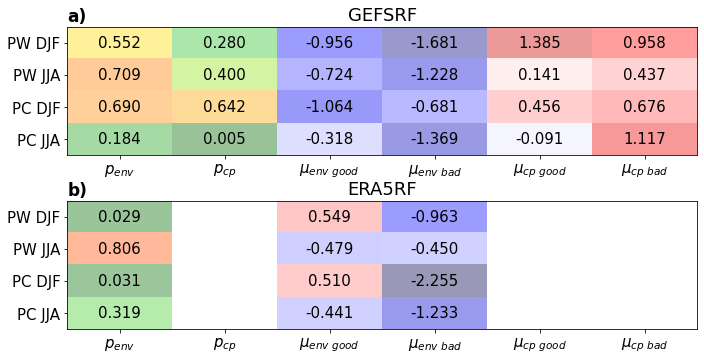

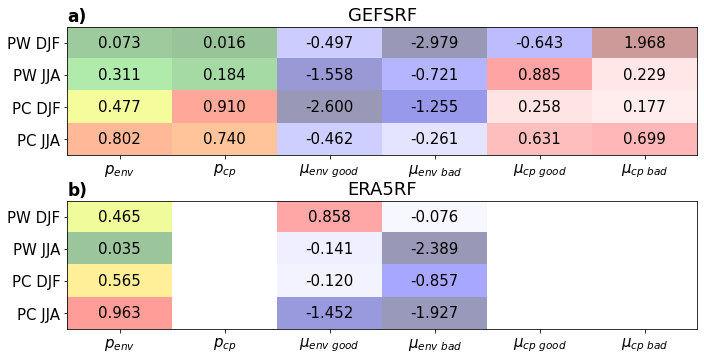

In [5]:
#set path
path = '/media/onno/Algemeen/Thesis/fcst_RWP_properties/duration/histograms/'
path_to_save = '/media/onno/Algemeen/Thesis/Main_Figures/'
#Load standardized RWP property forecast errors for statistical signficance
file_standardized = 'standardized_forecast_errors_stat_significance_lead_day_{}_NW_Europe.txt'
#Load absolute forecast errors to plot biases
file_AV = 'AV_forecast_errors_stat_significance_lead_day_{}_NW_Europe.txt'
#Row labels for figure
row_labelz = ['PW DJF','PW JJA','PC DJF','PC JJA']
#Column labels for figure
column_labelz = ['$p_{{env}}$','$p_{{cp}}$',
                '$μ_{{env\ good}}$','$μ_{{env\ bad}}$','$μ_{{cp\ good}}$',
                '$μ_{{cp\ bad}}$']
#custom colormap for background color
colorz = [(1,'#ff0000'),(0.75,'#ff6600'),(0.5,'#ffff00'),
          (0.3,'#33cc33'),(0,'#006600')]   
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', colorz[::-1], N=1024)

#loop over lead days
lead_dayz = [3,5]
for lead_day in lead_dayz:
    #load standardized and absolute forcast errors
    df_stand = pd.read_csv(path+file_standardized.format(lead_day),index_col=0)
    df_AV = pd.read_csv(path+file_AV.format(lead_day),index_col=0)
    #Only the data from the first 6 columns are for GEFS
    df_stand_GFS = df_stand.iloc[:4,:6]
    df_AV_GFS = df_AV.iloc[:4,:6]
    #create figure
    fig,axz = plt.subplots(2,1,figsize=(10,5))
    ax1 = axz.flat[0]
    #split dataframes up to be able to use different color maps
    df_GFS_p = df_stand_GFS.iloc[:,:2]
    df_GFS_p_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_p_mask[:,:2] = df_GFS_p.values
    df_GFS_mu = df_AV_GFS.iloc[:,2:]
    df_GFS_mu_mask = np.full(df_AV_GFS.shape,np.nan)
    df_GFS_mu_mask[:,2:] = df_GFS_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax1.imshow(df_GFS_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax1.imshow(df_GFS_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax1.set_yticks(np.arange(len(row_labelz)))
    ax1.set_yticklabels(row_labelz)
    ax1.set_xticks(np.arange(len(column_labelz)))
    ax1.set_xticklabels(column_labelz)
    ax1.set_title('GEFSRF')
    ax1.text(x=0,y=1.15,s='a'+')',transform=ax1.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                ax1.text(j,i,'{:.3f}'.format(df_stand_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                ax1.text(j,i,'{:.3f}'.format(df_AV_GFS.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    #for ERA5RF only the last 6 columns corresponds to its values
    df_AV_ERA5RF = df_AV.iloc[:4,6:]
    df_stand_ERA5RF = df_stand.iloc[:4,6:]
    ax2 = axz.flat[1]    
    #split dataframes up to be able to use different color maps
    df_ERA5RF_p = df_stand_ERA5RF.iloc[:,:2]
    df_ERA5RF_p_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_p_mask[:,:2] = df_ERA5RF_p.values
    df_ERA5RF_mu = df_AV_ERA5RF.iloc[:,2:]
    df_ERA5RF_mu_mask = np.full(df_AV_ERA5RF.shape,np.nan)
    df_ERA5RF_mu_mask[:,2:] = df_ERA5RF_mu.values
    #plot  p-values and forecast errors with corresponnding color maps and adjust plot layout
    ax2.imshow(df_ERA5RF_p_mask,aspect='auto',cmap=cmap,alpha=.4,vmin=0,vmax=1)
    ax2.imshow(df_ERA5RF_mu_mask,aspect='auto',cmap='seismic',alpha=.4,vmin=-2,vmax=2)
    ax2.set_yticks(np.arange(len(row_labelz)))
    ax2.set_yticklabels(row_labelz)
    ax2.set_xticks(np.arange(len(column_labelz)))
    ax2.set_xticklabels(column_labelz)
    ax2.set_title('ERA5RF')
    ax2.text(x=0,y=1.15,s='b'+')',transform=ax2.transAxes,fontweight='bold',fontsize=17,
                   verticalalignment='top')
    #loop over grids to plot numeric values
    for i in np.arange(len(row_labelz)):
        for j in np.arange(len(column_labelz)):
            if j<2:
                if np.isnan(df_stand_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_stand_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
            else:
                if np.isnan(df_AV_ERA5RF.values[i,j]):
                    continue
                else:
                    ax2.text(j,i,'{:.3f}'.format(df_AV_ERA5RF.values[i,j]),
                       ha='center',va='center',color='k',fontsize=15)
    fig.subplots_adjust(left=0.1,right=0.975,bottom=0.08,top=0.92,hspace=0.35)
    fig.savefig(path_to_save+'forecast_errors_tile_plot_lead_day_{}_duration_NW_Europe'.format(lead_day),dpi=150)
